<a href="https://colab.research.google.com/github/jeraldflowers/Linear-Algebra-for-ML-and-PCA/blob/main/applying_PCA_to_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
im = imageio.imread("/content/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [3]:
print("Original Max", end=' ')
print(np.amax(im))
print("Original Min", end=' ')
print(np.amin(im))

Original Max 204
Original Min 10


In [4]:
im_original = im
im = im/255

print("Original Max", end=' ')
print(np.amax(im))
print("Original Min", end=' ')
print(np.amin(im))

Original Max 0.8
Original Min 0.0392156862745098


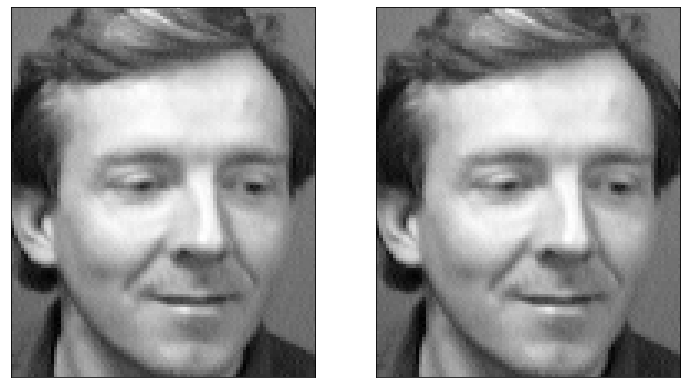

In [5]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks' : [], 'yticks': []})

ax[0].imshow(im_original, cmap='gray')
ax[1].imshow(im, cmap='gray')

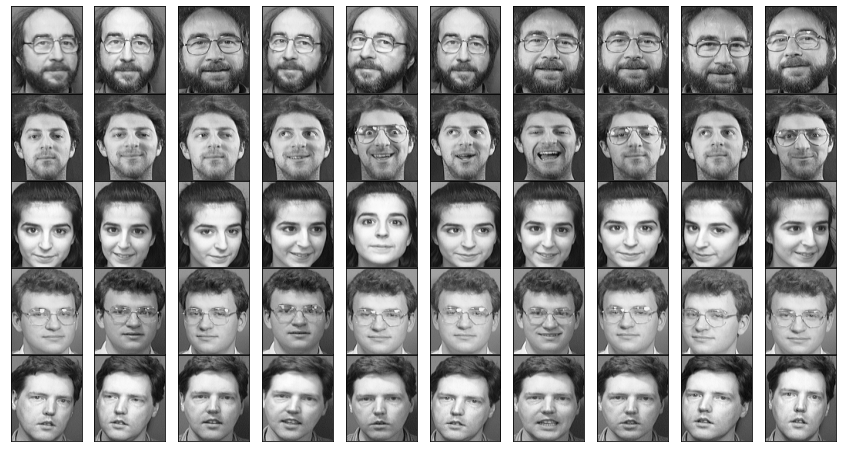

In [8]:
from glob import iglob

faces = pd.DataFrame([])

for path in iglob('/content/*/*.pgm'):
  im = imageio.imread(path)
  face = pd.Series(im.flatten(), name=path)
  faces = faces.append(face)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(faces.iloc[i].values.reshape(112, 92), cmap="gray")

In [9]:
from sklearn.decomposition import PCA

In [15]:
faces_pca = PCA(n_components=0.8)

faces_pca.fit(faces)

PCA(n_components=0.8)

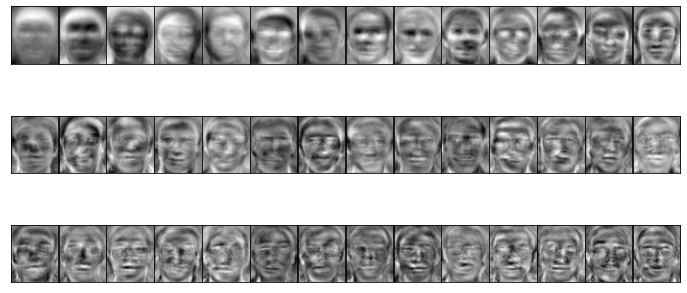

In [16]:
rows = 3
columns = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows, columns, figsize=(12,6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(faces_pca.components_[i].reshape(112, 92), cmap="gray")

In [17]:
print(faces_pca.n_components_)

44


In [18]:
components = faces_pca.transform(faces)
proyection = faces_pca.inverse_transform(components)

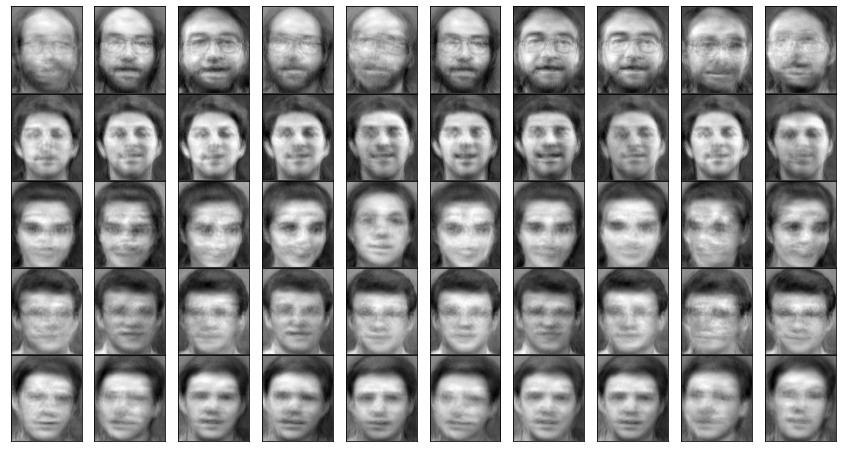

In [19]:
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(proyection[i].reshape(112, 92), cmap="gray")